# 프로젝트 고양이 수염 스티커 만들기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-준비하기" data-toc-modified-id="1.-데이터-준비하기-1">1. 데이터 준비하기</a></span></li><li><span><a href="#2.-얼굴-검출-face-detection" data-toc-modified-id="2.-얼굴-검출-face-detection-2">2. 얼굴 검출 face detection</a></span></li><li><span><a href="#3.-얼굴-랜드마크-face-landmark" data-toc-modified-id="3.-얼굴-랜드마크-face-landmark-3">3. 얼굴 랜드마크 face landmark</a></span></li><li><span><a href="#4.-스티커-적용하기" data-toc-modified-id="4.-스티커-적용하기-4">4. 스티커 적용하기</a></span><ul class="toc-item"><li><span><a href="#4.1-좌표-확인하기" data-toc-modified-id="4.1-좌표-확인하기-4.1">4.1 좌표 확인하기</a></span></li><li><span><a href="#4.2-스티커-이미지-불러오기" data-toc-modified-id="4.2-스티커-이미지-불러오기-4.2">4.2 스티커 이미지 불러오기</a></span></li></ul></li><li><span><a href="#5.-마치며" data-toc-modified-id="5.-마치며-5">5. 마치며</a></span></li></ul></div>

In [1]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

## 1. 데이터 준비하기

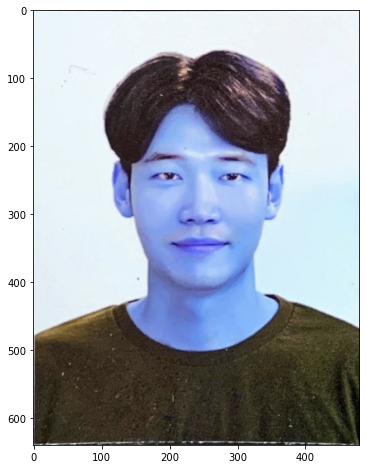

In [2]:
plt.figure(figsize=(8, 8))
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.jpg'
img_bgr = cv2.imread(my_image_path) # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480, 640))    # 480x640의 크기로 Resize
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show() ## 쨔쟌~ 욘두~

> opencv의 특징

matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용합니다. 
opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용합니다.
그래서 원본 사진에서 붉은색은 푸른색으로, 푸른색은 붉은색으로 바뀌어 출력됩니다.

**opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 색깔 보정처리를 해줘야 한다.**

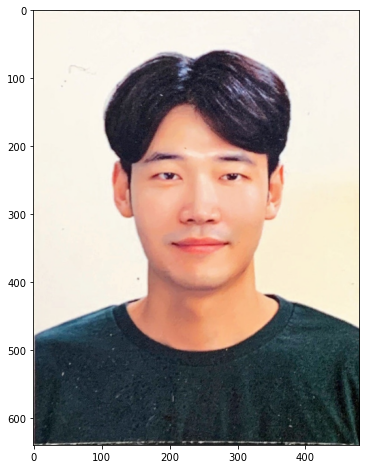

In [3]:
# RGB 이미지로 바꿔주기
plt.figure(figsize=(8, 8))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출 face detection

In [4]:
# dlib를 활용해서 hog detector를 선언하기
detector_hog = dlib.get_frontal_face_detector()

+ dlib은 rgb 이미지를 입력으로 받는다.
+ `cvtColor()`를 이용해서 opencv의 bgr 이미지를 rgb로 변경할 수 있다.

In [5]:
# detector를 이용해서 얼굴의 bounding box를 추출한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # dlib은 rgb 이미지를 입력으로 받음.
dlib_rects = detector_hog(img_rgb, 3)   # (image, num of img pyramid)

> Image Pyramids

detect_hog의 두 번째 파라미터는 이미지 피라미드의 수이다.

이미지 upsmapling 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 한다.

이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능하다!

이미지 피라미드 파라미터를 증가시킬수록 얼굴을 좀 더 정확하게 검출해 준다.

rectangles[[(149, 194) (348, 394)]]


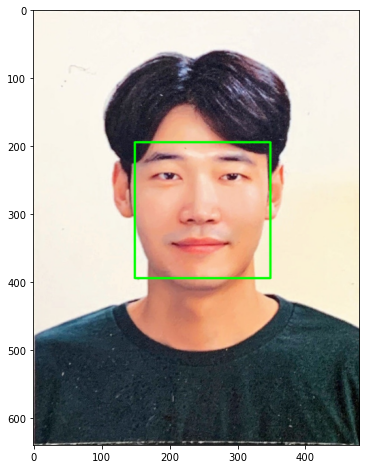

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.figure(figsize=(8, 8))
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# 확인해보기
for dlib_rect in dlib_rects:
    print(dlib_rect)
    print(dlib_rect.left())
    print(dlib_rect.top())
    print(dlib_rect.right())
    print(dlib_rect.bottom())
    
dlib_rects[0].left() # 반복문을 사용하지 않고, 인덱싱을 통해서도 가능!

[(149, 194) (348, 394)]
149
194
348
394


149

+ dlib detector 는 `dlib.rectangles` 타입의 객체를 반환한다.

+ `dlib.rectangles` 는 `dlib.rectangle` 객체의 배열 형태로 이루어져 있다.

+ `dlib.rectangle`객체는 `left()`, `top()`, `right()`, `bottom()`, `height()`, `width()` 등의 멤버 함수를 포함하고 있다.

> 사각형 그리기

top-left corner와 bottom-right corner점을 연결하는 사각형을 그립니다.

`cv2.rectangle(img, start, end, color, thickness, lineType)`

Parameters:	
+ img – 그림을 그릴 이미지
+ start – 시작 좌표(ex; (0,0))
+ end – 종료 좌표(ex; (500. 500))
+ color – BGR형태의 Color(ex; (255, 0, 0) -> Blue)
+ thickness (int) – 선의 두께. pixel
+ lineType 선을 화면에 표현하는 방법으로 디폴트로 cv2.LINE_8(8-connected)로 정해져 있다.

참고자료

+ https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html

## 3. 얼굴 랜드마크 face landmark

In [8]:
# 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
# 랜드마크 검출하기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


총 68개의 랜드마크가 `list_landmark`에 저장된다.

In [10]:
# list_landmarks 확인하기
list_landmarks[0][:5]

[(141, 245), (143, 272), (147, 298), (152, 324), (160, 350)]

각각 랜드마크별로 좌표를 가지고 있다.

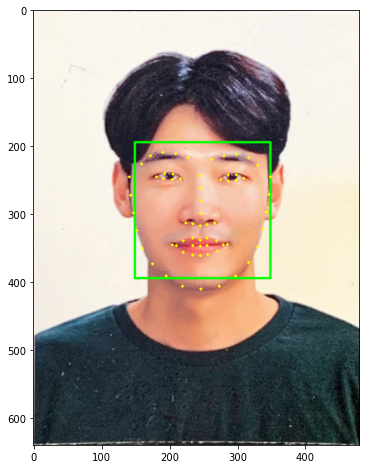

In [11]:
# 랜드마크 사진에 점으로 표시해 주기
for landmark in list_landmarks[0]:
    cv2.circle(img_show, landmark, 2, (0, 255, 255), -1) # yellow

        
plt.figure(figsize=(8, 8))
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # rgb로 변환
plt.imshow(img_show_rgb)
plt.show()

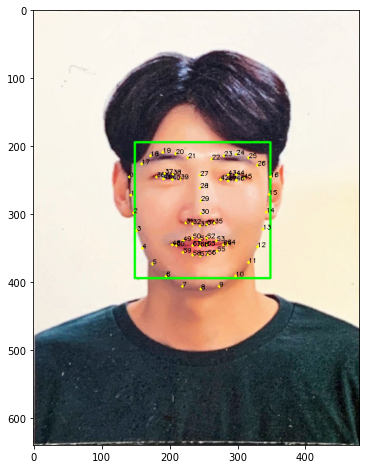

In [12]:
# 랜드마크 사진에 점으로 표시해 주기
for idx, landmark in enumerate(list_landmarks[0]):
    cv2.circle(img_show, landmark, 2, (0, 255, 255), -1) # yellow
    cv2.putText(img_show, str(idx), landmark,cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0)) # 점마다 숫자 붙여보기
        
plt.figure(figsize=(8, 8))
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # rgb로 변환
plt.imshow(img_show_rgb)
plt.show()

In [13]:
# 데이터 확인하기
for landmark in list_landmarks[0][:5]:
    print(landmark)

(141, 245)
(143, 272)
(147, 298)
(152, 324)
(160, 350)


> 원 그리기

`cv2.circle(img, center, radian, color, thickness)`

+ Parameters:	
    - img – 그림을 그릴 이미지
    - center – 원의 중심 좌표(x, y)
    - radian – 반지름
    - color – BGR형태의 Color
    - thickness – 선의 두께, -1 이면 원 안쪽을 채움

+ 참고자료
    - https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html

> 이미지에 Text 추가

+ `cv2.putText(img, text, org, font, fontSacle, color)`

+ Parameters:	
    - img – image
    - text – 표시할 문자열
    - org – 문자열이 표시될 위치. 문자열의 bottom-left corner점
    - font – font type. CV2.FONT_XXX
    - fontSacle – Font Size
    - color – fond color
    
+ 참고자료
    - https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html

## 4. 스티커 적용하기

얼굴 위치, 카메라와의 거리에 따라 픽셀 `x`가 다르기 때문에 비율로 계산을 해줘야 한다.

+ 계산할 수치
    1. 스티커 위치
        - x
        - y
    2. 스티커 크기
        - width
        - height

### 4.1 좌표 확인하기

In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] #- dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(246, 299)
(x,y) : (246,299)
(w,h) : (200,200)


In [15]:
# x, y 좌표 구하기
print(list_landmarks[0][30]) # nose center index : 30
x = list_landmarks[0][30][0]
y = list_landmarks[0][30][1]
print('x, y 좌표는 :',x, y)

# width , height 구하기
w = dlib_rects[0].width()
h = dlib_rects[0].width()
print('width와 height의 길이는 :', w, h)

(246, 299)
x, y 좌표는 : 246 299
width와 height의 길이는 : 200 200


### 4.2 스티커 이미지 불러오기

(200, 200, 3)


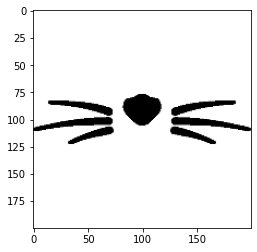

In [16]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 이미지 불러오기
img_sticker = cv2.resize(img_sticker, (w,h)) # 이미지 사이즈 조정하기
print (img_sticker.shape) # 스티커 이미지 데이터 사이즈

# 스티커 이미지 시각화
plt.imshow(img_sticker)
plt.show()

In [17]:
# 원본 이미지에 스티커를 넣을 좌표 설정하기
# 이미지의 시작점은 top-left 좌표이다.
refined_x = x - w // 2  # 왼쪽으로 이동
refined_y = y - h // 2  # 위로 이동
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (146,199)


In [18]:
len(img_show), len(img_show[0]) # 사진의 크기

(640, 480)

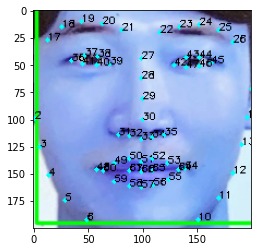

In [19]:
# 원본 이미지에서 스티커를 적용할 부분을 크롭한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# sticker_area 시각화
plt.imshow(sticker_area)
plt.show()

In [20]:
img_show.shape

(640, 480, 3)

+ 이해가 안되던 점.
    - 왜 img_show를 슬라이싱할 때 y를 앞에 x를 뒤에 넣을까?    
        * 너무 x, y 개념으로 접근했다.
        * 넘파이 배열 개념에서는 y가 행의 개수, x가 열의 개수이다.

In [21]:
# 크롭한 이미지에 스티커 적용하기!
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0, sticker_area, img_sticker).astype(np.uint8)

> np.where



In [22]:
sticker_area.shape, img_sticker.shape

((200, 200, 3), (200, 200, 3))

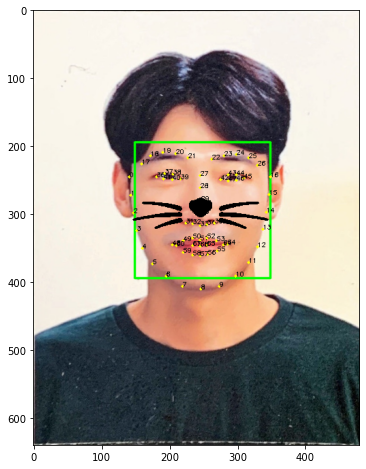

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

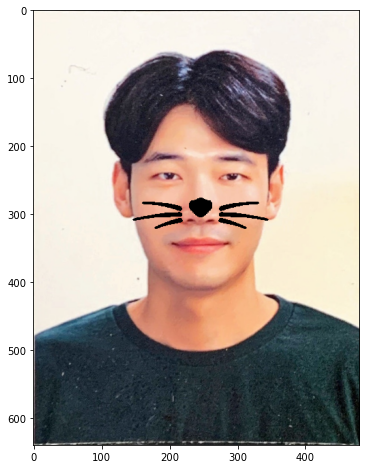

In [24]:
# 아껴뒀던 원본에 출력하기

# sticker_area를 슬라이싱해서 sticker 적용.
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 5. 마치며

이미지에서 얼굴을 찾아내고 랜드마크를 적용하여 스티커를 적용해보았다. 스노우 카메라 등 수많은 카메라 어플들이 어떤 방식으로 얼굴을 인식해서 적용하는지, 어떻게 동작하는지 알게됐다. 이 프로젝트를 하면서 크게 이미지, 랜드마크, 스티커에 대해 조금 더 깊이있게 배우게 됐다.

1. 이미지
    + cv2 라이브러리를 어떻게 사용해야 할지, 어떤 방식으로 사용해야 할지 그리고 다양한 메서드 사용에 대해 배웠다.
    + 이미지에 좌표에 대해 그리고 그 적용에 대해 다룰 수 있게 됐다.
    
2. 얼굴 검출과 랜드마크
    + 얼굴을 검출하고 랜드마크를 잡는 과정은 정말로 흥미로웠다.
    + 이미지 피라미드를 높일 수록 더 정확한 얼굴을 검출했다.
    + 랜드마크 또한 다른 모델을 사용하여 랜드마크를 적용해보고 싶다.
    + 랜드마크의 어떤 좌표를 사용할지에 대해 조금 더 고민이 필요하다(어떤 좌표를 사용해야 더 정확하게 스티커를 적용할 수 있을까에 대한 고민).

3. 스티커
    + 스티커마다 적용하는 방식이 다를 것 같다. 더 다양한 스티커를 적용해보고 싶다.
    + 스티커에 대한, 그리고 색의 값에 대한 개념이 아직 완전하지 않다. 만약 배경이 있는 스티커라면 어떻게 추출해야할지.
    + 얼굴의 각도에 따라 스티커를 틀어서 적용하는 것에 대해 시도했지만 성공하지 못했다.
    + 좌표에 대한 개념이 많이 부족하다.
    
프로젝트를 할 때마다 수학에 대해서 필요성을 정말 정말 정말 정말 강하게 느낀다. 간단한 수학부터 공부하고 있다. 다른 스티커들을 적용하며 어떻게 해야 더 자연스럽게 스티커를 적용할 수 있을지, 그리고 얼굴 각도에 따라 스티커를 어떻게 적용할 수 있을지에 대해서도 적용해보고 싶다.